In [1]:
# keep things reproducable by setting the random seed.
import random
random.seed(31415)

# AU-UV Ices Spectrum Tools
A better name is work-in-progress.

This tool is designed to help you manage data obtained at the AU-UV endstation of the ASTRID2 synchrotron at Aarhus Univeristy, in Denmark.
Its current main functionality is to read the data files produced by the endstation, calculate absorbances, and produce plots of absorbance.
It can also fit the absorbance data with gaussian functions as a first step in your data analysis.

This document provides usage examples. To being using the tools, you must have `spectools.py` in your working directory, and import it as follows:

In [2]:
import spectools
#help(spectools)

You can run `help(spectools)` to see a full summary of the classes and methods. 

## Example: Reading Data

To read data, you need to know the paths to your relevant samples and backgrounds. You can have as many samples and backgrounds as you want, and they will be averaged together. For this example, I have two. 

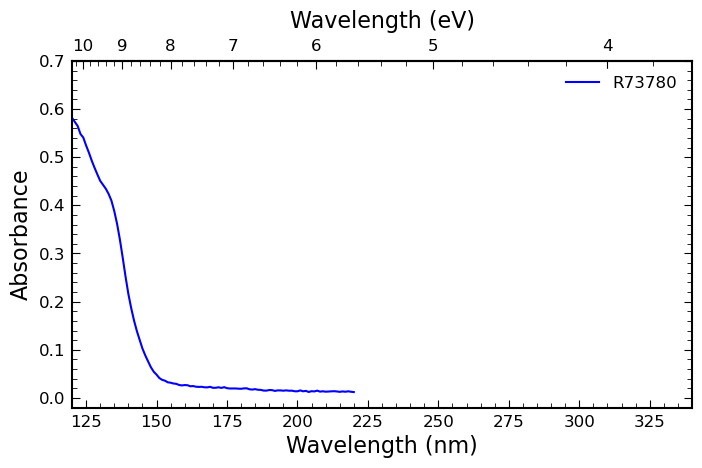

In [28]:
path = "./raw_data/SergioIoppolo-November2023/20231101/"

bkgd_short1 = path + "R73773.d01"
bkgd_short2 = path + "R73773.d02"
sample_short1 = path + "R73780.d01"
sample_short2 = path + "R73780.d02"

# build the spectrum object
spec1 = spectools.Spectrum()
spec1.change_name("R73780")
# add backgrounds
spec1.add_bkgd(bkgd_short1)
spec1.add_bkgd(bkgd_short2)
# add samples
spec1.add_sample(sample_short1)
spec1.add_sample(sample_short2)
# give it a color (is black by default)
spec1.change_color("blue")
# average the scans together
spec1.average_scans()

# make a plot of the data
spectools.plot_absorbance([spec1], figsize=(8, 4.5),
                      xlim=(120, 340), ylim=(-0.02, 0.7),
                      save_path="./misc_figures/one_spectrum.svg");

By running `help` on the `Spectrum` object you can see all its methods:

In [7]:
help(spec1)

Help on Spectrum in module spectools object:

class Spectrum(builtins.object)
 |  Represents a spectrum, so the average of one or more scans
 |  
 |  Parameters belonging to the fully constructed object:
 |      
 |      baseline_p : (list) parameters from the fit of the rayleigh scattering
 |                   baseline. None until subtract_baseline() has been run.
 |      bkgd : (pandas.DataFrame) The averaged background data.
 |      bkgd_files : (list) a list of background files that make up the scans.
 |      color : (str) the hex color used for plotting this spectrum.
 |      data : (pandas.DataFrame) the data belonging to this
 |             spectrum, averaged together from its corresponding
 |             scans.
 |      fit_components : (list) a list of dictionaries which make up the fit
 |                       components after `fit_peaks()` is called. Each 
 |                       dictionary has the following components: parameters,
 |                       and absorbance. Th

`Spectrum` objects have several attributes. Below are the attributes of the one we just constructed.

In [8]:
spec1.name

'R73780'

In [9]:
spec1.color

'blue'

In [10]:
# these are the calibrated data which are used for plotting and fitting
spec1.data

,absorbance,wavelength
index,,
0,-1.495123e-01,110.0
1,-1.694994e-01,111.0
2,-1.128651e-01,112.0
3,-2.184924e-01,113.0
4,9.881313e-324,114.0
...,...,...
106,1.342025e-02,216.0
107,1.274583e-02,217.0
108,1.369792e-02,218.0


In [11]:
# this is a value which can control a shift in absorbance of the data for
# plotting. More details on offsets are below
spec1.offset

0.0

In [12]:
# this controls if this spectrum is visible in plotting or not. This is not so
# useful when working in jupyter notebook or other code interfaces, but very
# useful in a GUI where you can use checkboxes to control what is plotted.
spec1.visible

True

In [13]:
# a list of the SingleScan objects belonging to this Spectrum. Details on
# SingleScan objects are below.
spec1.scans

AttributeError: 'Spectrum' object has no attribute 'scans'

In [ ]:
# a list of the background files associated with this Spectrum
spec1.bkgds

In [14]:
# a list of the sample files associated with this Spectrum
spec1.samples

AttributeError: 'Spectrum' object has no attribute 'samples'

## Example: Plotting Data

Above, we plotted one spectrum in blue. But the `plot_absorbance` function is designed for plotting several spectra if we want to. In this example, we build a second `Spectrum` object and plot its data alongside the one we made previously. Note that `plot_absorbance` takes a list of `Spectrum` objects to plot. This list can be as long as you like.

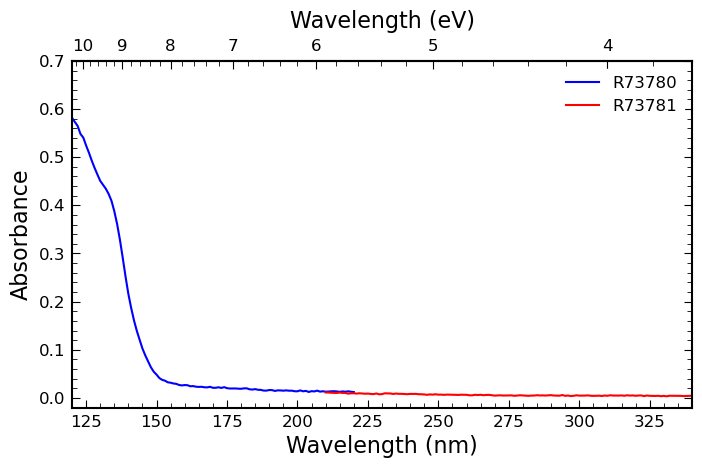

In [27]:
bkgd_long1 = path + "R73775.d01"
bkgd_long2 = path + "R73775.d02"
sample_long1 = path + "R73781.d01"
sample_long2 = path + "R73781.d02"

# build long spectrum
spec2 = spectools.Spectrum()
spec2.change_name("R73781")
spec2.add_bkgd(bkgd_long1)
spec2.add_bkgd(bkgd_long2)
spec2.add_sample(sample_long1)
spec2.add_sample(sample_long2)
spec2.change_color("red")
spec2.average_scans()

spectools.plot_absorbance([spec1, spec2], figsize=(8, 4.5),
                      xlim=(120, 340), ylim=(-0.02, 0.7),
                      save_path="./misc_figures/two_spectrums.svg");

## Example: Shifting Spectrums

The spectra are not perfectly aligned. This happens normally with the endstation, and 

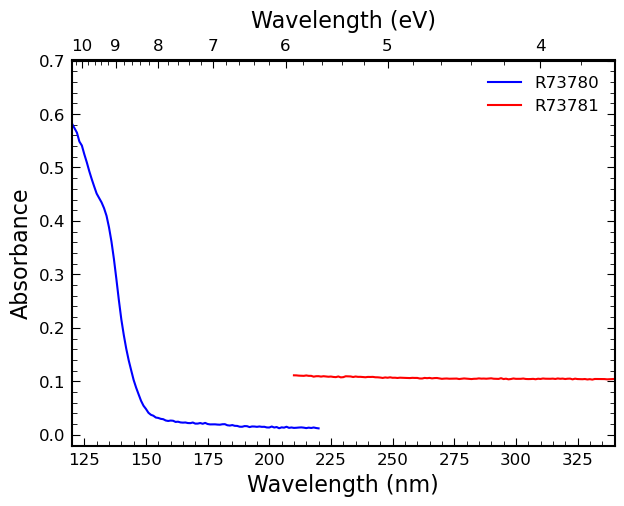

In [16]:
spec2.change_offset(0.1)

spectools.plot_absorbance([spec1, spec2], figsize=(7, 5),
                      xlim=(120, 340), ylim=(-0.02, 0.7),
                      save_path="./misc_figures/shift_example.svg");

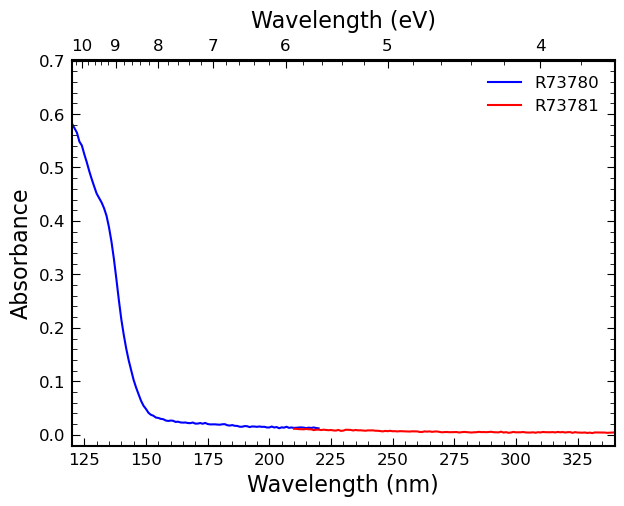

In [17]:
spec2.change_offset(0.0)

spectools.plot_absorbance([spec1, spec2], figsize=(7, 5),
                      xlim=(120, 340), ylim=(-0.02, 0.7),
                      save_path="./misc_figures/shift_example_2.svg");

## Example: Stitching Spectra

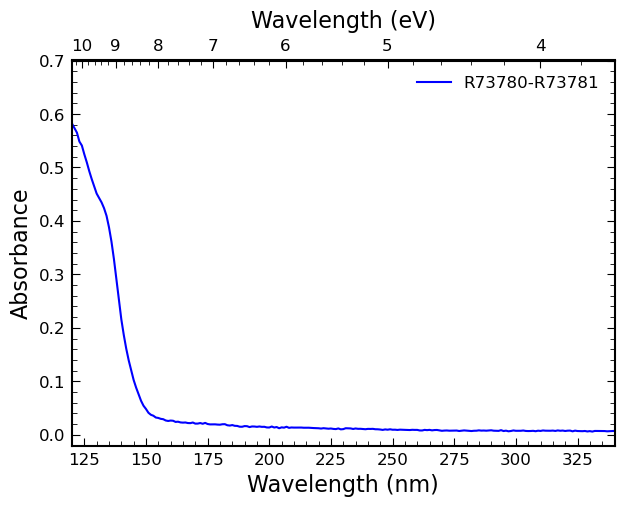

In [18]:
stitched = spectools.StitchedSpectrum(spec1, spec2)

spectools.plot_absorbance([stitched], figsize=(7, 5),
                      xlim=(120, 340), ylim=(-0.02, 0.7),
                      save_path="./misc_figures/stitched.svg");

In [19]:
stitched.name

'R73780-R73781'

In [20]:
stitched.visible

True

In [21]:
stitched.color

'blue'

In [22]:
stitched.offset

0

In [23]:
stitched.scans

AttributeError: 'StitchedSpectrum' object has no attribute 'scans'

In [24]:
stitched.samples

AttributeError: 'StitchedSpectrum' object has no attribute 'samples'

In [25]:
stitched.bkgds

AttributeError: 'StitchedSpectrum' object has no attribute 'bkgds'

## Example: Changing Names

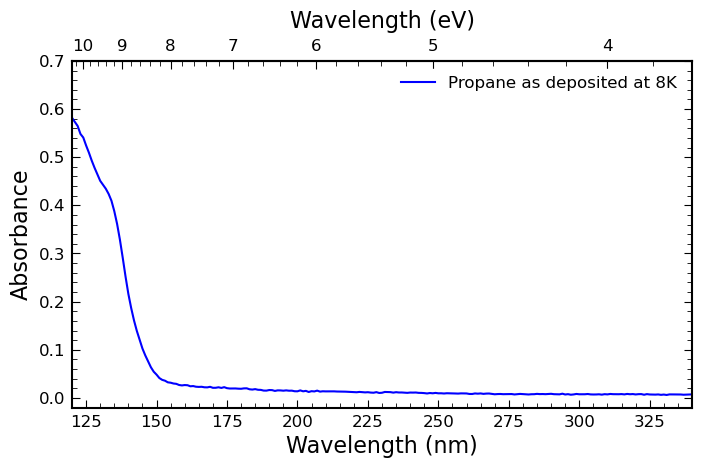

In [26]:
stitched.change_name("Propane as deposited at 8K")

spectools.plot_absorbance([stitched], figsize=(8, 4.5),
                      xlim=(120, 340), ylim=(-0.02, 0.7),
                      save_path="./misc_figures/name_change.svg");

## Example: Changing Colors

/home/lars/miniconda3/envs/snpy2/lib/python3.10/site-packages/matplotlib/ticker.py:2937: RuntimeWarning: invalid value encountered in log10
  majorstep_no_exponent = 10 ** (np.log10(majorstep) % 1)


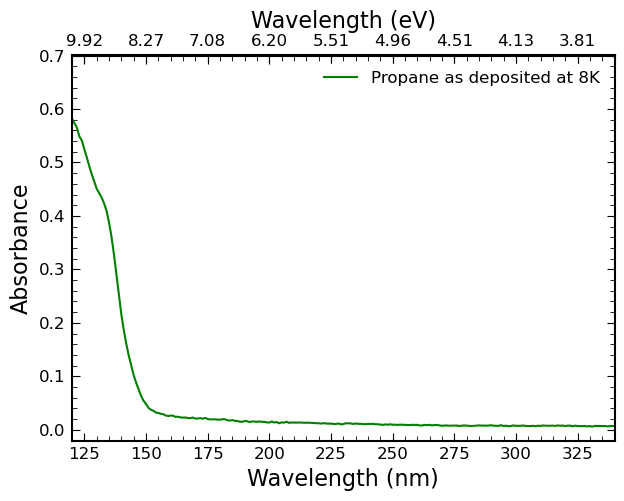

In [25]:
stitched.change_color("green")

spectools.plot_absorbance([stitched], figsize=(7, 5),
                      xlim=(120, 340), ylim=(-0.02, 0.7),
                      save_path="./misc_figures/color_change.svg");

## Example: Simple Baseline Subtraction

For the baseline subtraction, the minimum value is found in some wavelenght range passed to the function. The entire absorbance data are then shifted such that the minimum is at zero.

/home/lars/miniconda3/envs/snpy2/lib/python3.10/site-packages/matplotlib/ticker.py:2937: RuntimeWarning: invalid value encountered in log10
  majorstep_no_exponent = 10 ** (np.log10(majorstep) % 1)


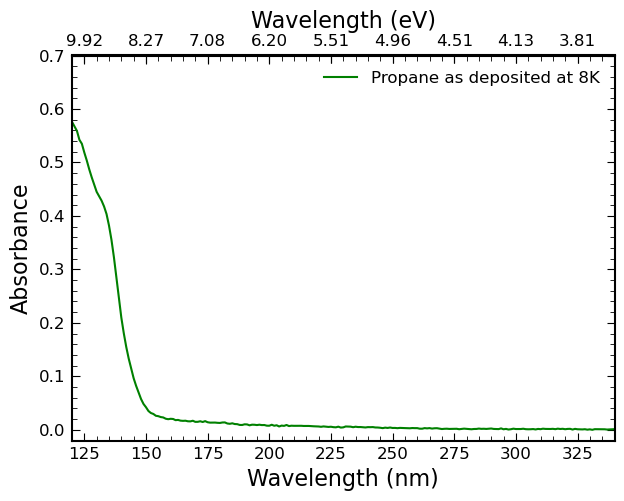

In [26]:
stitched.subtract_baseline(lim=(120, 340))

spectools.plot_absorbance([stitched], figsize=(7, 5),
                      xlim=(120, 340), ylim=(-0.02, 0.7),
                      save_path="./misc_figures/baseline_subtract.svg");

## Example: Fitting with gaussians

You can fit with any arbitrary number of gaussians. If you provide your own guesses, you can only fit up to the number of functions you provide guesses for. Otherwise, you can fit as many gaussians as you want. However, the program will choose the fit with the best reduced chi square, which tends to prefer smaller numbers of free parameters. It is not advised to fit more than 8 gaussians, as the fitting is slow the more free parameters you have, and higher numbers will score poorly on the reduced chi square test.

In [39]:
import spectools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

# keep things reproducable
random.seed(31415)
# define colors for plotting
colors = ["#dcdcdc", "#2f4f4f", "#a52a2a", "#191970", "#006400", "#bdb76b", "#9acd32",
"#66cdaa", "#ff0000", "#ff8c00", "#ffd700", "#c71585", "#0000cd", "#00ff00",
"#00fa9a", "#00bfff", "#ff00ff", "#dda0dd", "#7b68ee", "#ffa07a"]

def build_spectra(path, bkgd_short1, bkgd_short2, bkgd_long1, bkgd_long2,
                  sample_short1, sample_short2, sample_long1, sample_long2,
                  color="#000001", name=None):
    """
    Builds the spectra as appropriate for this experiment
    """
    # build short spectrum
    spec1 = spectools.Spectrum()
    spec1.change_name(sample_short1[-9:-4])
    spec1.add_bkgd(bkgd_short1)
    spec1.add_bkgd(bkgd_short2)
    spec1.add_sample(sample_short1)
    spec1.add_sample(sample_short2)
    spec1.change_color(color)
    spec1.change_offset(0.0)
    spec1.average_scans()

    # build long spectrum
    spec2 = spectools.Spectrum()
    spec2.change_name(sample_long1[-9:-4])
    spec2.add_bkgd(bkgd_long1)
    spec2.add_bkgd(bkgd_long2)
    spec2.add_sample(sample_long1)
    spec2.add_sample(sample_long2)
    spec2.change_color(color)
    spec2.change_offset(0.0)
    spec2.average_scans()

    stiched = spectools.StitchedSpectrum(spec1, spec2)
    if name:
        stiched.change_name(name)
    return stiched

path = "./raw_data/SergioIoppolo-November2023/20231101/"

bkgd_short1 = path + "R73773.d01"
bkgd_short2 = path + "R73773.d02"
bkgd_long1 = path + "R73775.d01"
bkgd_long2 = path + "R73775.d02"

sample_short1 = path + "R73808.d01"
sample_short2 = path + "R73808.d02"
sample_long1 = path + "R73809.d01"
sample_long2 = path + "R73809.d02"

spec = build_spectra(path, bkgd_short1, bkgd_short2, bkgd_long1, bkgd_long2,
                        sample_short1, sample_short2, sample_long1, sample_long2,
                        color=colors[11], name="Propane + 1x10$^{15}$ 1keV e$^{-}$/cm$^{2}$ (200K)")


# fix the end of the spectrum to 0
i = len(spec.data['absorbance'])
spec.change_offset(-1*spec.data['absorbance'][i-1])

Attempting fit with 1 gaussians
success! reduced chi2: 990.00
Attempting fit with 2 gaussians
success! reduced chi2: 1.74
Attempting fit with 3 gaussians
success! reduced chi2: 1.27
Attempting fit with 4 gaussians
success! reduced chi2: 1.06
Attempting fit with 5 gaussians
success! reduced chi2: 0.85
Attempting fit with 6 gaussians
success! reduced chi2: 0.76
The best fit was achieved with 4 gaussians and a reduced chi2 of 1.06


(<Axes: ylabel='Absorbance'>, <Axes: xlabel='Wavelength (nm)'>)

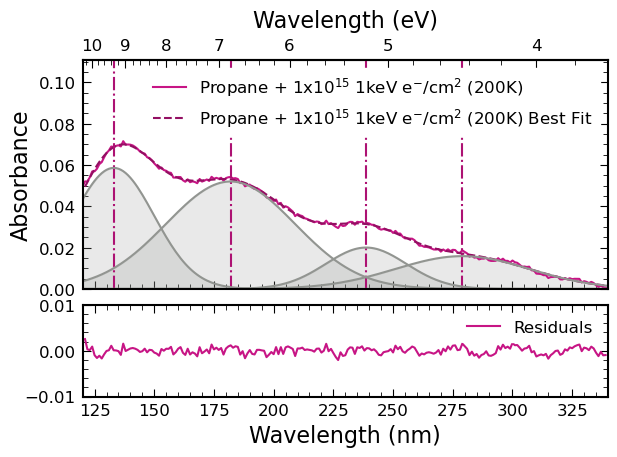

In [40]:
guesses = [{'lower':0, 'guess':4, 'upper':5},   # amplitude
           {'lower':0, 'guess':135, 'upper':340},   # center
           {'lower':0, 'guess':20, 'upper':340},   # standard deviation
           
           {'lower':0, 'guess':3, 'upper':5},   # amplitude
           {'lower':0, 'guess':185, 'upper':340},   # center
           {'lower':0, 'guess':20, 'upper':340},   # standard deviation
           
           {'lower':0, 'guess':2, 'upper':5},   # amplitude
           {'lower':225, 'guess':240, 'upper':250},   # center
           {'lower':0, 'guess':20, 'upper':340},   # standard deviation
           
           {'lower':0, 'guess':0.4, 'upper':5},   # amplitude
           {'lower':274, 'guess':276, 'upper':279},   # center
           {'lower':0, 'guess':20, 'upper':100},   # standard deviation
           
           {'lower':0, 'guess':0.4, 'upper':5},   # amplitude
           {'lower':296, 'guess':298, 'upper':300},   # center
           {'lower':0, 'guess':20, 'upper':100},   # standard deviation
           
           {'lower':0, 'guess':0.1, 'upper':5},   # amplitude
           {'lower':324, 'guess':326, 'upper':328},   # center
           {'lower':0, 'guess':10, 'upper':100},   # standard deviation
          ]

spec.fit_peaks(verbose=True, ng=(1, 7), guesses=guesses, fit_lim=(120, 340))
spectools.plot_fit(spec, plot_peaks=True, figsize=(8, 4.5), xlim=(120, 340),
               ylim=(0, spec.data[spec.data['wavelength']>120]['absorbance'].max()*1.1),
               plot_fit_components=True, save_path="./misc_figures/fit.svg",
               res_lims=(-0.01, 0.01))

In [29]:
spec.data

,wavelength,absorbance,best_fit,residuals
0,110.0,0.044227,NaN,NaN
1,111.0,0.005053,NaN,NaN
2,112.0,0.062241,NaN,NaN
3,113.0,0.017806,NaN,NaN
4,114.0,0.097399,NaN,NaN
...,...,...,...,...
226,336.0,0.030058,0.031236,-0.001178
227,337.0,0.030845,0.031092,-0.000247
228,338.0,0.029956,0.030957,-0.001001
229,339.0,0.029881,0.030829,-0.000948


In [30]:
spec.peaks

[{'peak': 133.03670941978515, 'peak_error': 0.3163892557277485},
 {'peak': 181.92222081560436, 'peak_error': 0.5931870401532279},
 {'peak': 238.69352885196065, 'peak_error': 0.7148448628674884},
 {'peak': 278.9999999999992, 'peak_error': 2.565412028641303}]

In [31]:
spec.fit_results

{'reduced_chi_square': 1.0602474276643126,
 'n_gaussians': 4,
 'n_custom_components': 0,
 'fitted_scattering': False,
 'custom_component_parameters': [],
 'scattering_parameters': [],
 'gaussian_parameters': [{'value': 2.4795343369326917,
   'error': 0.12705852118421168,
   'parameter': 'amplitude'},
  {'value': 133.03670941978515,
   'error': 0.3163892557277485,
   'parameter': 'center'},
  {'value': 16.88599531109746,
   'error': 0.36950582330178117,
   'parameter': 'std'},
  {'value': 3.5141832488241005,
   'error': 0.17342510497925384,
   'parameter': 'amplitude'},
  {'value': 181.92222081560436,
   'error': 0.5931870401532279,
   'parameter': 'center'},
  {'value': 26.959823025684152,
   'error': 1.2490531142891035,
   'parameter': 'std'},
  {'value': 0.8465246215116191,
   'error': 0.131335332321512,
   'parameter': 'amplitude'},
  {'value': 238.69352885196065,
   'error': 0.7148448628674884,
   'parameter': 'center'},
  {'value': 16.8585773437582, 'error': 0.9147359253635284, 'p

In [32]:
spec.fit_components

[{'parameters': [{'value': 2.4795343369326917,
    'error': 0.12705852118421168,
    'parameter': 'amplitude'},
   {'value': 133.03670941978515,
    'error': 0.3163892557277485,
    'parameter': 'center'},
   {'value': 16.88599531109746,
    'error': 0.36950582330178117,
    'parameter': 'std'}],
  'wavelength': 0      110.0
  1      111.0
  2      112.0
  3      113.0
  4      114.0
         ...  
  226    336.0
  227    337.0
  228    338.0
  229    339.0
  230    340.0
  Name: wavelength, Length: 231, dtype: float64,
  'absorbance': 0      0.052287
  1      0.054186
  2      0.056148
  3      0.058161
  4      0.060216
           ...   
  226    0.029187
  227    0.029187
  228    0.029187
  229    0.029187
  230    0.029187
  Name: wavelength, Length: 231, dtype: float64},
 {'parameters': [{'value': 3.5141832488241005,
    'error': 0.17342510497925384,
    'parameter': 'amplitude'},
   {'value': 181.92222081560436,
    'error': 0.5931870401532279,
    'parameter': 'center'},
   {'v

## Example: Fitting with whatever you want

## Difference in Plotting Functions

## Details on the stitching algorithm

## Deposition Time Scans

Spectra are not the only data taken at the UV endstation. It is also necessary to monitor the deposition of an ice with the deposition time scans. These can then be fit, and optics principles can be used to determine the dosing rate and index of refraction of the ice. This is done using `deptools.py`, for deposition tools.

In [33]:
import deptools

`deptools` has only one class: `DepositionTimeScan`. It is initialized by giving it the data file of some deposition time scan. The data can then be plotted with `plot_timescan()`

<Axes: xlabel='Time (seconds)', ylabel='Ch2 Signal (volts)'>

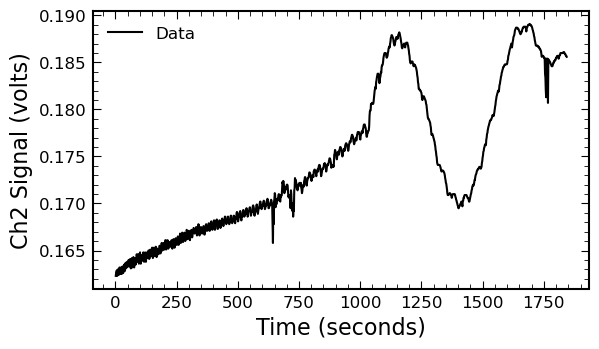

In [34]:
# create the DepositionTimeScan object
path = "./raw_data/SergioIoppolo-November2023/20231101/T73776.dat"
dep = deptools.DepositionTimeScan(path)

# plot it
deptools.plot_timescan(dep, save_path="./misc_figures/deposition_fit.svg")

Finding the dosing rate is then (in principle) very easy. All you need to do is run `find_dowing_rate()` and give the function a few parameters, all of which are optional for the function itself, but likely necessary to get a good fit.

The first of these is `guesses` which contains the guesses for the fitted parameters. It is structured the same way as the guesses for spectrum fitting. It should be a list where each item in the list is a dictionary containing a lower and upper limit on the parameter, and a guess. There are five parameters that are fit every time. These parameters are called `m`, `c`, `xc`, `w`, and `n`. The function being fit with these parameters is shown below:

$$
f\left(x\right) = mx + c + \left(c\frac{n-1}{n+1}\right)\sin\left(\frac{x-x_c}{w}\right)
$$

The function is the combination of a line and a sine wave. Parameters `m` and `c` describe the slope and y-intercept of the line component respectively. Parameter `n` describes the index of refraction of the deposited ice, parameter `xc` describes the x-shift $x_c$, and parameter `w` describes the 'wavelength' of the sine wave (note that the wavelength in this function has units of time). Note that the expression $\left(c\frac{n-1}{n+1}\right)$ is a constant that describes the amplitude of the sine wave. The function is not fit directly to the raw data, but rather to gaussian smoothed data. This helps avoid broken fits when the time range is small.

The next important parameters are `t_start` and `t_end` which are the start and end times of the deposition in seconds. As seen in the example file above, the entire file does not represent the deposition. In the example, the deposition starts at roughly 1020 seconds and ends at roughly 1700 seconds. Trying to use the above function to fit any of the data outside that range will either break or give a nonsense result, so these parameters are very important and should not be omitted.

The next parameter is `theta_degrees` which describes in degrees the angle of incidence between the laser and the substrate. By default this is 22 and should not be changed unless the physical setup of the chamber has been changed.

Finally, there is the parameter `verbose`, which can be true or false. If true, the function will print extra statements with the values of the fitted parameters.


The fit suceeded with a reduced chi square of 9.563e-05
The deposition rate is 0.563 +- 0.001 nm/s
The ice's index of refraction is 1.108 +- 0.000
The other fitted values are:
{'name': 'm', 'value': 2.8282401931405917e-06, 'error': 5.731004752505085e-08}
{'name': 'c', 'value': 0.17507069780989565, 'error': 7.680759589176671e-05}
{'name': 'xc', 'value': 507.0789337486854, 'error': 0.6368204695810634}
{'name': 'w', 'value': 258.22277093156555, 'error': 0.2016692645478068}


<Axes: xlabel='Time (seconds)', ylabel='Ch2 Signal (volts)'>

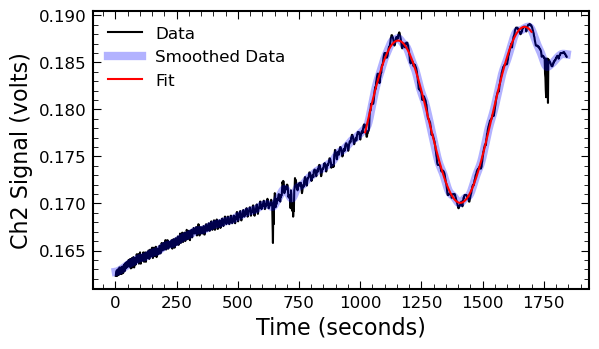

In [41]:
# importing numpy so we can set the limits on the parameters to infinity
import numpy as np

# setup our guesses. These are the same as the default guesses if none are provided
guesses = [{'lower':-np.inf, 'guess':3e-6, 'upper':np.inf}, # m
           {'lower':-np.inf, 'guess':0, 'upper':np.inf}, # c
           {'lower':-np.inf, 'guess':200, 'upper':np.inf}, # xc
           {'lower':0, 'guess':300, 'upper':np.inf}, # w
           {'lower':1, 'guess':1.2, 'upper':4.1} # n
            ]

# fit the data and get the dosing rate
dep.find_dosing_rate(guesses=guesses, t_start=1020, t_end=1700, verbose=True)
deptools.plot_timescan(dep, save_path="./misc_figures/deposition_fit.svg")

Now that you have the deposition rate, you can easily find out how much ice was deposited over some given time. This is just multiplying the rate by the deposition time, but there is a built in function to do this for you and handle the associated error more conveniently than by hand. This function is `find_thickness` and takes two parameters. The first is `dep_time`, the deposition time in seconds, and the second is `verbose`, whether or not to print extra statements. The function returns the deposited ice thickness in nanometers as well as its error.

In [42]:
thickness, error = dep.find_thickness(dep_time=680, verbose=True)

The ice deposited for 680 seconds will be 382.802 +- 0.642 nm thick.


That is a very thick ice. In our experiments, we only wanted an ice of around 10 nm thick. The timescan above was taken just in order to measure the deposition rate, not actually do the deposition. When we deposited the ice we experimented on, we only deposited for 20 seconds.

In [43]:
thickness, error = dep.find_thickness(dep_time=20, verbose=True)

The ice deposited for 20 seconds will be 11.259 +- 0.019 nm thick.


This gave roughly the desired thickness, as we can see here. But why not just fit the deposition scan of the ice we actually used? A deposition time of only 20 seconds is far too short to generate a fittable sine curve like the one above. Further, the user might not yet know how long they want to deposit for, only how thick of an ice they want to eventually have. The deposition rate must be found first. This is also why the program does not automatically calculate the thickness of the deposited ice when you run `find_dosing_rate()`.

But what about that user who knows what thickness of ice they want, but not how long to deposit for? `deptools` can also calculate that in much the same way as finding the thickness:

In [44]:
time, error = dep.find_deposition_time(thickness=10, verbose=True)

The ice deposited to 10 nm will take 17.764 +- 0.030 seconds.


Finally, what about exporting all of these parameters? That is easily done with the `export` function, which will save the fitted parameters to a csv file at a specified path:

In [45]:
dep.export("./misc_figures/deposition_fit.csv")

if we now read that csv file we will see:

In [46]:
import pandas as pd

df = pd.read_csv("./misc_figures/deposition_fit.csv")
df

,name,value,error
0,m,0.000003,5.731005e-08
1,c,0.175071,7.680760e-05
2,xc,507.078934,6.368205e-01
3,w,258.222771,2.016693e-01
4,n,1.108265,1.632825e-04
5,dosing rate (nm/s),0.562944,9.442719e-04
6,refractive index,1.108265,1.632825e-04
7,redchi2,0.000096,NaN
